<a href="https://colab.research.google.com/github/Mottarav/modelo_knn/blob/main/knn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1º IMPORTANDO BIBLIOTECAS

In [ ]:
!pip install sidetable 
!pip install pandas-profiling==3.3.0

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import plotly.express as px
from scipy.sparse import csr_matrix
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

import sidetable

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import scale, MinMaxScaler, power_transform
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import time
from datetime import date 

from IPython.core.display import HTML
from ipywidgets import interact, widgets

import itertools

# 2º VISUALIZAÇÃO DOS DADOS E PRIMEIROS PASSOS

In [ ]:
df = pd.read_csv("df2scala.csv")
df.head(1)

,siteid,date,time_epoch_hr,visitor_visitorid,visitor_visitcount,sku,product_name,category,price,quantity,order_transactionid,order_revenue,current_purchase,total_purchases,month
0,SAP-5535048,2022-08-22 00:00:00,2022-08-22 15:07:47,0001030c8dc84ed2,1.0,HOS14607A,Rolo para Esterilizacao 10cm x 50m - HOSPFLEX,Rolo para Esterilizacao - 1224,33.9,1.0,7304985,103.6,1,2,8


In [ ]:
df['date'] = pd.to_datetime((df['date']),format="%Y-%m-%d %H:%M")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50404 entries, 0 to 50403
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   siteid               50404 non-null  object        
 1   date                 50404 non-null  datetime64[ns]
 2   time_epoch_hr        50404 non-null  object        
 3   visitor_visitorid    50404 non-null  object        
 4   visitor_visitcount   50404 non-null  float64       
 5   sku                  50404 non-null  object        
 6   product_name         50404 non-null  object        
 7   category             50260 non-null  object        
 8   price                50404 non-null  float64       
 9   quantity             50404 non-null  float64       
 10  order_transactionid  50404 non-null  int64         
 11  order_revenue        50404 non-null  float64       
 12  current_purchase     50404 non-null  int64         
 13  total_purchases      50404 non-

In [ ]:
df.describe()

,visitor_visitcount,price,quantity,order_transactionid,order_revenue,current_purchase,total_purchases,month
count,50404.000000,50404.000000,50404.000000,5.040400e+04,50404.000000,50404.000000,50404.000000,50404.000000
mean,11.877966,80.267965,15.639850,1.323626e+07,400.870705,2.397032,3.796663,7.099595
std,18.861737,319.879867,95.205716,2.397791e+07,812.981082,2.424564,3.709516,1.987112
min,1.000000,0.000000,1.000000,1.000000e+00,0.000000,1.000000,2.000000,4.000000
25%,2.000000,6.990000,1.000000,6.653816e+06,0.000000,1.000000,2.000000,5.000000
50%,6.000000,19.000000,2.000000,7.019271e+06,171.000000,2.000000,3.000000,7.000000
75%,14.000000,39.900000,6.000000,7.425513e+06,474.650000,3.000000,4.000000,9.000000
max,722.000000,14900.000000,7000.000000,1.026954e+08,30789.200000,43.000000,43.000000,10.000000


### Selecionando colunas para dataframe menor

In [ ]:
df.columns

Index(['siteid', 'date', 'time_epoch_hr', 'visitor_visitorid',
       'visitor_visitcount', 'sku', 'product_name', 'category', 'price',
       'quantity', 'order_transactionid', 'order_revenue', 'current_purchase',
       'total_purchases', 'month'],
      dtype='object')

In [ ]:
cols = ['visitor_visitorid','date','product_name','category','quantity','total_purchases']
df_reduzido = df[cols]
df_reduzido = df_reduzido[df_reduzido['total_purchases']>1]
df_reduzido.sort_values(by='total_purchases').head()

,visitor_visitorid,date,product_name,category,quantity,total_purchases
0,0001030c8dc84ed2,2022-08-22,Rolo para Esterilizacao 10cm x 50m - HOSPFLEX,Rolo para Esterilizacao - 1224,1.0,2
28071,90c9035b94956a73,2022-04-08,Mascara Hospitalar Dobravel PFF2 9920H - 3M,Mascara Descartavel - 1423,20.0,2
28070,90c2766463bae850,2022-08-10,Estojo CliniCase Turquesa - MD,Estetoscopios - 1398,1.0,2
28069,90c2766463bae850,2022-08-10,Estetoscopio Littmann Classic III 5803 Black E...,Estetoscopios - 1398,1.0,2
28038,90ba3d3e7f3343a8,2022-07-04,Esfigmomanometro Aneroide Preto PREMIUM,Esfigmomanometro Aneroide - 1415,2.0,2


# 3º TRATAMENTO DOS DADOS

## DADOS DUPLICADOS

Não encontrei linhas duplicadas

## DADOS NULOS

### IDENTIFICANDO DADOS NULOS

In [ ]:
# IDENTIFICANDO E MOSTRANDO QUANTIDADE DE VALORES NULOS
df_reduzido.isna().sum()

visitor_visitorid      0
date                   0
product_name           0
category             144
quantity               0
total_purchases        0
dtype: int64

In [ ]:
# ver linhas da coluna com valores nulos
df_reduzido[df_reduzido.category.isna()]

,visitor_visitorid,date,product_name,category,quantity,total_purchases
2496,0cf3cf9fd2c9cf5f,2022-10-17,Ganhou Espelho Bucal,NaN,1.0,2
2516,0cf3cf9fd2c9cf5f,2022-10-18,Ganhou Espelho Bucal,NaN,1.0,2
3349,0fee7a9d9544a892,2022-10-14,GANHOU Resina Neo Spectra ST,NaN,1.0,2
5820,1ccd9f90204bf37b,2022-10-15,Ganhou Kit KG Personalizado,NaN,1.0,2
6302,1e7e420054ac462c,2022-10-15,Ganhou Espelho Bucal,NaN,1.0,2
...,...,...,...,...,...,...
48364,f42733c769740b26,2022-10-18,Ganhou Revelador Selekt 500ML,NaN,1.0,2
49789,fc38ef56ac8dffff,2022-10-13,Ganhou Bag Dobravel,NaN,1.0,2
49813,fc38ef56ac8dffff,2022-10-13,Ganhou Pasta Polimento Eagle Diamond,NaN,1.0,2
50203,fe9e41a77733d5b3,2022-10-18,Ganhou Revelador Selekt 500ML,NaN,1.0,2


In [ ]:
# valores nulos - proporção com resto do dataset
(df_reduzido.category.isna().sum())/ df_reduzido.shape[0]*100

0.2856916117768431

### REMOVENDO VALORES NULOS

In [ ]:
# dropna na variavel categoria
df_reduzido.dropna(subset=['category'],inplace=True)

In [ ]:
df_reduzido.isna().sum()

visitor_visitorid    0
date                 0
product_name         0
category             0
quantity             0
total_purchases      0
dtype: int64

# 4º ANALISE COM DATA NO INDEX

Nesse dataframe com apenas dados de 1 unica empresa temos a data mais antiga sendo: 01/04/22 

e nossa data mais recente: 19/10/22

In [ ]:
df_data_index = df_reduzido.set_index('date').sort_index()
df_data_index

,visitor_visitorid,product_name,category,quantity,total_purchases
date,,,,,
2022-04-01,6ff824addb986ddf,Luva Latex para Procedimento - SUPERMAX,Luvas - 1105,1.0,10
2022-04-01,12c896371200307a,"Envelope para Esterilizacao Autosselante 5,5 x...",Envelope para Esterilizacao - 1432,1.0,4
2022-04-01,c66a64d5e18e6d5f,Mascara Hospitalar Dobravel PFF2 9920H - 3M,Mascara Descartavel - 1423,12.0,3
2022-04-01,c66a64d5e18e6d5f,Mascara Aura 9320 BR PFF2 - 3M,Mascara Descartavel - 1423,19.0,3
2022-04-01,fb6a4f411690dfcf,Alcool Etilico Hidratado 70 1L INPI - PROLINK,Alcool - 207,8.0,16
...,...,...,...,...,...
2022-10-19,2a4485900be8f6c4,Broca Gates 32mm No 02 - CA,Broca,1.0,2
2022-10-19,2a4485900be8f6c4,Jaleco Feminino Basic Branco - M,Jaleco Feminino,1.0,2
2022-10-19,2a4485900be8f6c4,Luva para Procedimento Latex P,Luvas,6.0,2


In [ ]:
print(f'Data mais recente: {df_reduzido.date.max()}\nData mais antiga: {df_reduzido.date.min()}')

Data mais recente: 2022-10-19 00:00:00
Data mais antiga: 2022-04-01 00:00:00


In [ ]:
# quantidades TOTAIS vendidas por data
graph_qnt_mes = df_data_index.groupby(['date']).agg({'quantity': sum}).sort_values(by='quantity', ascending=False)
graph_qnt_mes.head()

,quantity
date,
2022-08-11,20725.0
2022-05-24,18762.0
2022-06-08,13788.0
2022-08-08,12046.0
2022-05-10,9741.0


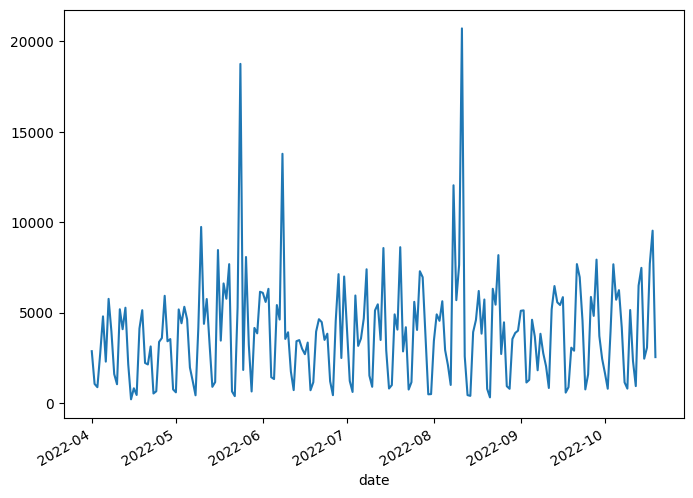

In [ ]:
# plot para ver qtd x mês
plt.figure(figsize=(8,6))
graph_qnt_mes.quantity.plot()

In [ ]:
# quantidades vendidas por data por categoria
graph_qnt_mes = df_data_index.groupby(['date','category']).agg({'quantity': sum}).sort_values(by='date', ascending=True)
graph_qnt_mes.head()

quantity
date       category                            
2022-04-01 Abaixador de Lingua - 163        1.0
           Oximetro - 12901                 1.0
           Nao Esteril - 27                 4.0
           Mascara Descartavel - 2695       3.0
           Mascara Descartavel - 1423     149.0

# 5º NORMALIZAÇÃO DOS DADOS / PIVOT TABLE

## 1

In [ ]:
df_norm = df_reduzido[['visitor_visitorid','product_name','quantity']]
df_norm.head()

,visitor_visitorid,product_name,quantity
0,0001030c8dc84ed2,Rolo para Esterilizacao 10cm x 50m - HOSPFLEX,1.0
1,0001030c8dc84ed2,Agua Destilada 5L - SSPLUS,1.0
2,0001030c8dc84ed2,Algodao Hidrofilo 500g Rolo - MELHORMED,1.0
3,0001030c8dc84ed2,Detergente Enzimatico Zymedet Gold 5 Enzimas 1...,1.0
4,0001030c8dc84ed2,Desinfetante Germi Rio 1L - RIOQUIMICA,1.0


In [ ]:
matrix = df_norm.pivot_table(index='product_name',columns='visitor_visitorid',values='quantity')
matrix.head()

visitor_visitorid,0001030c8dc84ed2,0003cb364618e8ca,000ef5b554d08a2b,001b5d00c954d026,0020471dab30b4a9,00226592c4b564c3,002ad86d2a3e067e,003bffb7b3daec52,003ef46c3e42d484,0057a3aed73a784d,...,ffb9c3b721d91fb1,ffc4e9f56a431574,ffc61de5f8510fc7,ffcd659ba8f61204,ffe10344fe84e099,ffe2ab0630c716e9,ffe2c8f561517e0d,fff05e608b07de30,fff6080665f0fe5c,ffff9f4d6845d28d
product_name,,,,,,,,,,,,,,,,,,,,,
Kit Matriz Unimatrix R - TDV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kit Silicone de Adicao Variotime - Kulzer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abaixador de Lingua - AGAPLASTIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abaixador de Lingua Bruenings - QUINELATO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abaixador de Lingua Palito - ESTILO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# normalizando (nem sei se precisa)
matrix_norm = matrix.subtract(matrix.mean(axis=1),axis=0)
matrix_norm.set_index(matrix.index)
matrix_norm.head()

visitor_visitorid,0001030c8dc84ed2,0003cb364618e8ca,000ef5b554d08a2b,001b5d00c954d026,0020471dab30b4a9,00226592c4b564c3,002ad86d2a3e067e,003bffb7b3daec52,003ef46c3e42d484,0057a3aed73a784d,...,ffb9c3b721d91fb1,ffc4e9f56a431574,ffc61de5f8510fc7,ffcd659ba8f61204,ffe10344fe84e099,ffe2ab0630c716e9,ffe2c8f561517e0d,fff05e608b07de30,fff6080665f0fe5c,ffff9f4d6845d28d
product_name,,,,,,,,,,,,,,,,,,,,,
Kit Matriz Unimatrix R - TDV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kit Silicone de Adicao Variotime - Kulzer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abaixador de Lingua - AGAPLASTIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abaixador de Lingua Bruenings - QUINELATO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abaixador de Lingua Palito - ESTILO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matrix_norm.fillna(0,inplace=True)
matrix_norm.head()

visitor_visitorid,0001030c8dc84ed2,0003cb364618e8ca,000ef5b554d08a2b,001b5d00c954d026,0020471dab30b4a9,00226592c4b564c3,002ad86d2a3e067e,003bffb7b3daec52,003ef46c3e42d484,0057a3aed73a784d,...,ffb9c3b721d91fb1,ffc4e9f56a431574,ffc61de5f8510fc7,ffcd659ba8f61204,ffe10344fe84e099,ffe2ab0630c716e9,ffe2c8f561517e0d,fff05e608b07de30,fff6080665f0fe5c,ffff9f4d6845d28d
product_name,,,,,,,,,,,,,,,,,,,,,
Kit Matriz Unimatrix R - TDV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kit Silicone de Adicao Variotime - Kulzer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abaixador de Lingua - AGAPLASTIC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abaixador de Lingua Bruenings - QUINELATO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abaixador de Lingua Palito - ESTILO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2 - (scale)

In [ ]:
df_norm_scale = df_reduzido[['visitor_visitorid','product_name','quantity']]
matrix_scale = df_norm_scale.pivot_table(index='product_name',columns='visitor_visitorid',values='quantity')
matrix_scale.apply(scale)

visitor_visitorid,0001030c8dc84ed2,0003cb364618e8ca,000ef5b554d08a2b,001b5d00c954d026,0020471dab30b4a9,00226592c4b564c3,002ad86d2a3e067e,003bffb7b3daec52,003ef46c3e42d484,0057a3aed73a784d,...,ffb9c3b721d91fb1,ffc4e9f56a431574,ffc61de5f8510fc7,ffcd659ba8f61204,ffe10344fe84e099,ffe2ab0630c716e9,ffe2c8f561517e0d,fff05e608b07de30,fff6080665f0fe5c,ffff9f4d6845d28d
product_name,,,,,,,,,,,,,,,,,,,,,
Kit Matriz Unimatrix R - TDV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kit Silicone de Adicao Variotime - Kulzer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abaixador de Lingua - AGAPLASTIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abaixador de Lingua Bruenings - QUINELATO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abaixador de Lingua Palito - ESTILO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wraps para Esterilizacao SMS 60g 30 x 30cm - POLARFIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wraps para Esterilizacao SMS 60g 40 x 40cm - POLARFIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wraps para Esterilizacao SMS 60g 60 x 60cm - POLARFIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matrix_scale.fillna(0,inplace=True)
matrix_scale.head()

visitor_visitorid,0001030c8dc84ed2,0003cb364618e8ca,000ef5b554d08a2b,001b5d00c954d026,0020471dab30b4a9,00226592c4b564c3,002ad86d2a3e067e,003bffb7b3daec52,003ef46c3e42d484,0057a3aed73a784d,...,ffb9c3b721d91fb1,ffc4e9f56a431574,ffc61de5f8510fc7,ffcd659ba8f61204,ffe10344fe84e099,ffe2ab0630c716e9,ffe2c8f561517e0d,fff05e608b07de30,fff6080665f0fe5c,ffff9f4d6845d28d
product_name,,,,,,,,,,,,,,,,,,,,,
Kit Matriz Unimatrix R - TDV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kit Silicone de Adicao Variotime - Kulzer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abaixador de Lingua - AGAPLASTIC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abaixador de Lingua Bruenings - QUINELATO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abaixador de Lingua Palito - ESTILO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6º TRANSFORMAR EM MATRIX SPARSA

Serve para compactar matrixes que possuem muitos zeros

In [ ]:
# 1
matrix_sparse = csr_matrix(matrix_norm)

In [ ]:
# 2
matrix_sparse_scale = csr_matrix(matrix_scale)

# 7º MODELO DE RECOMENDAÇÃO KNN (NEAREST NEIGHTBORS)

## MODELO KNN - DADOS NORMALIZAÇÃO 1

In [ ]:
# criando e treinando modelo KNN
modelo = NearestNeighbors(algorithm = 'brute')
modelo.fit(matrix_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
pd.options.display.max_colwidth = 1000
df['product_name'].drop_duplicates().head(30)

0                                  Rolo para Esterilizacao 10cm x 50m - HOSPFLEX
1                                                     Agua Destilada 5L - SSPLUS
2                                        Algodao Hidrofilo 500g Rolo - MELHORMED
3                      Detergente Enzimatico Zymedet Gold 5 Enzimas 1L - PROLINK
4                                         Desinfetante Germi Rio 1L - RIOQUIMICA
5                                  Alcool Etilico Hidratado 70 1L INPI - PROLINK
8                           Fita Hipoalergenica Micropore 25mm x 10m - Bege - 3M
9                                           Compressa de Gaze 9 Fios - MELHORMED
10                           Fita Hipoalergenica Micropore Bege 50mm x 10m  - 3M
11                         Atadura de Crepom Ultracotton 8cm x 1,80m - MELHORMED
12                          Atadura de Algodao Ortopedico 10cm x 1,8m - POLARFIX
13                        Atadura de Crepom Ultracotton 10cm x 1,80m - MELHORMED
14                          

In [ ]:
# testando com produto "Seringa para Insulina 0,5ml - 6mm x 0,25mm 31g - UNIQMED"
# kneighbors retorna index e distancia e como nosso index são os nomes dos produtos, isso será como um sistema de recomendação, 
# retornando os indexs que possuem melhor distancia
distances, suggestions = modelo.kneighbors(matrix_norm.filter(items=['Envelope para Esterilizacao Autosselante 90 x 26cm - 200 Unid. - MEDSTERIL'],axis=0).values.reshape(1,-1))
for i in range(len(suggestions)):
  print(matrix_norm.index[suggestions[i]])

Index(['Envelope para Esterilizacao Autosselante 90 x 26cm - 200 Unid. - MEDSTERIL',
       'Envelope para Esterilizacao Autosselante 90x260mm - 200 Unid. HOSPFLEX',
       'Envelope Esterilizacao Autosselante 9 x 16cm - HOSPFLEX',
       'Envelope para Esterilizacao Autosselante 7 x 23cm - MEDSTERIL',
       'Mascara Descartavel Tripla com Elastico - Branco - PROTCLEAN'],
      dtype='object', name='product_name')


## MODELO KNN - DADOS NORMALIZAÇÃO 2 (scale)

In [ ]:
# criando e treinando modelo KNN
modelo2 = NearestNeighbors(algorithm = 'brute', n_neighbors=5)
modelo2.fit(matrix_sparse_scale)

NearestNeighbors(algorithm='brute')

In [ ]:
df['product_name'].drop_duplicates().head(30)

0                                  Rolo para Esterilizacao 10cm x 50m - HOSPFLEX
1                                                     Agua Destilada 5L - SSPLUS
2                                        Algodao Hidrofilo 500g Rolo - MELHORMED
3                      Detergente Enzimatico Zymedet Gold 5 Enzimas 1L - PROLINK
4                                         Desinfetante Germi Rio 1L - RIOQUIMICA
5                                  Alcool Etilico Hidratado 70 1L INPI - PROLINK
8                           Fita Hipoalergenica Micropore 25mm x 10m - Bege - 3M
9                                           Compressa de Gaze 9 Fios - MELHORMED
10                           Fita Hipoalergenica Micropore Bege 50mm x 10m  - 3M
11                         Atadura de Crepom Ultracotton 8cm x 1,80m - MELHORMED
12                          Atadura de Algodao Ortopedico 10cm x 1,8m - POLARFIX
13                        Atadura de Crepom Ultracotton 10cm x 1,80m - MELHORMED
14                          

In [ ]:
# testando com produto "Seringa para Insulina 0,5ml - 6mm x 0,25mm 31g - UNIQMED"
# kneighbors retorna index e distancia e como nosso index são os nomes dos produtos, isso será como um sistema de recomendação, 
# retornando os indexs que possuem melhor distancia

# knn espera receber informações em formato de array, portanto no codigo abaixo estou selecionando com um filter o produto
# pedindo os valores daquela linha do produto e transformando em um array de apenas aquele produto
# para assim buscar os produtos que possuem menor distancia com ele
distances, suggestions = modelo2.kneighbors(matrix_scale.filter(items=['Inderma Microagulhamento - 0,50mm - INDERMA'],axis=0).values.reshape(1,-1))

for i in range(len(suggestions)):
  print(matrix_scale.index[suggestions[i]])
print(distances)

Index(['Jaleco Feminino Lolla Fashion Bordo - G - DRA. FASHION',
       'Jaleco Feminino London Bege - G - BIOSTILO',
       'Inderma Microagulhamento - 0,50mm - INDERMA',
       'Inderma Microagulhamento - 1,00mm - INDERMA',
       'Inalador Nebulizador Adulto e Infantil Azul MD1000 AZT - MEDICATE'],
      dtype='object', name='product_name')
[[0.         0.         0.         1.         1.41421356]]
